In [2]:
import fredapi as fa
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
fred = fa.Fred('3258cc777cc97a53229e08f54d9846c1')

In [3]:
credit = fred.get_series('HSN1F')
credit.name = 'New One Family Houses Sold' 
df = pd.DataFrame(credit)
df = df.reset_index() 
df['index'] = df['index'].dt.year
df

,index,New One Family Houses Sold
0,1963,591.0
1,1963,464.0
2,1963,461.0
3,1963,605.0
4,1963,586.0
...,...,...
718,2022,582.0
719,2022,622.0
720,2023,648.0
721,2023,623.0


In [9]:
#rounding and taking the average for each year
year = df.groupby(['index'])
df = round(year.mean(),2)
df.tail()

,New One Family Houses Sold
index,
2019,683.17
2020,831.25
2021,769.42
2022,640.50
2023,651.33


In [5]:
Unemployment   = fred.get_series('FLUR')
Unemployment.name = 'Unemployment Rate in Florida'
df1 = pd.DataFrame(Unemployment)
df1 = df1.reset_index() 
df1['index'] = df1['index'].dt.year
df1.head()

,index,Unemployment Rate in Florida
0,1976,9.7
1,1976,9.7
2,1976,9.6
3,1976,9.5
4,1976,9.3


In [8]:
#rounding and taking the average for each year
year = df1.groupby(['index'])
df1 = round(year.mean(),2)
df1.tail()

,Unemployment Rate in Florida
index,
2019,3.25
2020,8.17
2021,4.66
2022,2.90
2023,2.60


In [11]:
df2 = pd.merge(df, df1, on='index')
df2

,New One Family Houses Sold,Unemployment Rate in Florida
index,,
1976,652.33,9.30
1977,819.58,8.28
1978,815.58,6.76
1979,703.50,5.99
1980,545.33,5.98
1981,435.75,6.80
1982,418.17,8.48
1983,627.33,8.64
1984,636.75,6.59


In [15]:
df2.to_csv("Fred_data3.csv")

In [16]:
fred_data = pd.read_csv('Fred_data3.csv')
fred_data.tail()

,index,New One Family Houses Sold,Unemployment Rate in Florida
43,2019,683.17,3.25
44,2020,831.25,8.17
45,2021,769.42,4.66
46,2022,640.50,2.90
47,2023,651.33,2.60


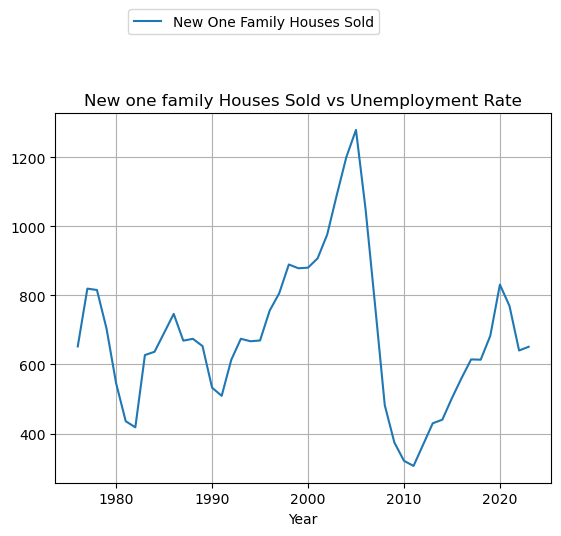

In [21]:
plt.plot(fred_data['index'], df2['New One Family Houses Sold'], label='New One Family Houses Sold')
#plt.plot(fred_data['index'], df2['Unemployment Rate in Florida'], label='Unemployment Rate in Florida')
plt.xlabel('Year')
plt.ylabel('Family Houses sold')
plt.title('New one family Houses Sold')
plt.legend(loc="upper center", bbox_to_anchor=(0.4, 1.3))
plt.grid()
plt.savefig("Delinquency Rate.png")
plt.show()

In [ ]:
plt.savefig("Delinquency Rate.png")

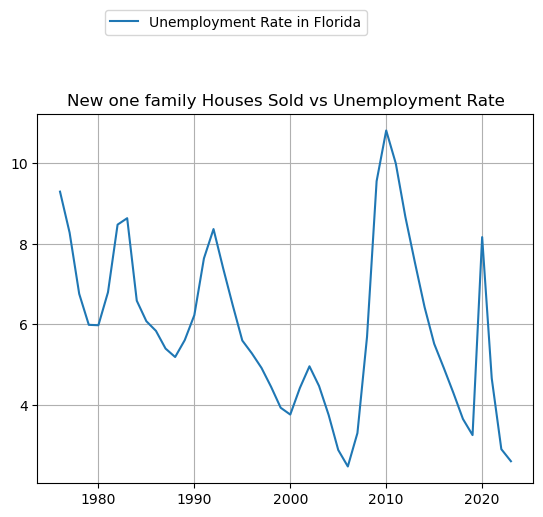

In [18]:
plt.plot(fred_data['index'], df2['Unemployment Rate in Florida'], label='Unemployment Rate in Florida')
plt.title('New one family Houses Sold vs Unemployment Rate')
plt.legend(loc="upper center", bbox_to_anchor=(0.4, 1.3))
plt.grid()
plt.savefig("Delinquency Rate.png")
plt.show()